# Ploynomail Regression:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_set =pd.read_csv("Salary Data.csv")
data_set.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
data_set.shape

(375, 6)

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
data_set1=data_set.drop_duplicates()

In [6]:
data_set1.isnull().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

In [7]:
data_set1.dropna()
data_set1.fillna(data_set1.mean(), inplace=True)


<Axes: >

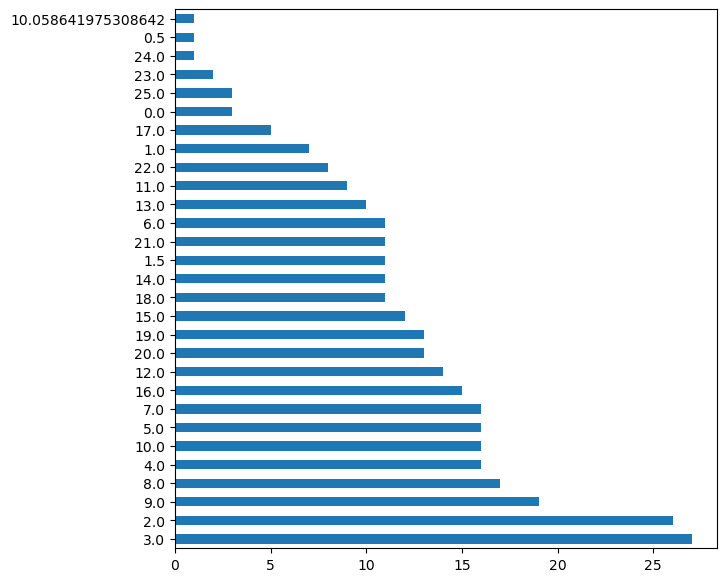

In [8]:
data_set1['Years of Experience'].value_counts().plot(kind="barh", figsize=(7, 7))


<Axes: >

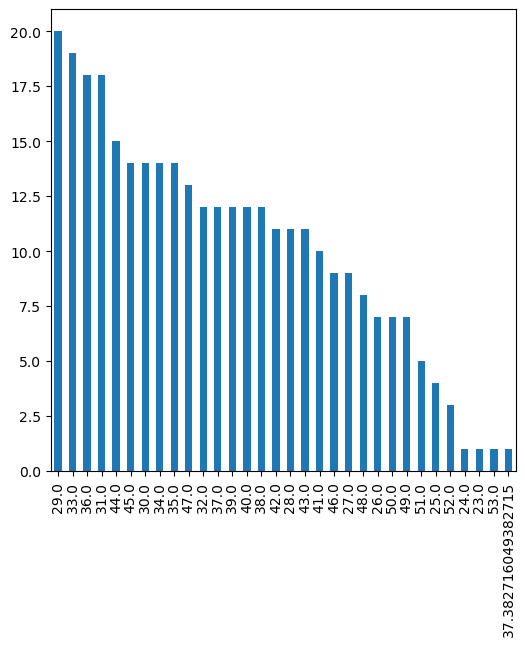

In [9]:
data_set1['Age'].value_counts().plot(kind="bar", figsize=(6, 6))


In [10]:
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [11]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

data_set1["Gender"]=Label_Encoder.fit_transform(data_set1["Gender"])
data_set1["Education Level"]=Label_Encoder.fit_transform(data_set1["Education Level"])
data_set1["Job Title"]=Label_Encoder.fit_transform(data_set1["Job Title"])
data_set1.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_set1["Age"]=scaler.fit_transform(data_set1[["Age"]])
data_set1["Years of Experience"]=scaler.fit_transform(data_set1[["Years of Experience"]])
data_set1["Job Title"]=scaler.fit_transform(data_set1[["Job Title"]])

data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-0.751388,1,0,1.478511,-0.762996,90000.0
1,-1.309758,0,1,-1.530144,-1.064656,65000.0
2,1.063317,1,2,0.864067,0.745306,150000.0
3,-0.193017,0,0,0.249624,-0.461335,60000.0
4,2.040466,1,1,-1.424205,1.499456,200000.0


In [13]:
X = data_set1[["Age", "Gender", "Education Level", "Job Title", "Years of Experience"]]
y = data_set1["Salary"]


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=42)

In [18]:
poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

In [19]:
r2_poly = r2_score(y_test, y_pred_poly)

print("R-squared (Polynomial Regression) is {0:.2f}% :". format( 100*r2_poly))

R-squared (Polynomial Regression) is 93.69% :


Text(0.5, 1.0, 'Predicted vs Actual Salary (Polynomial Regression)')

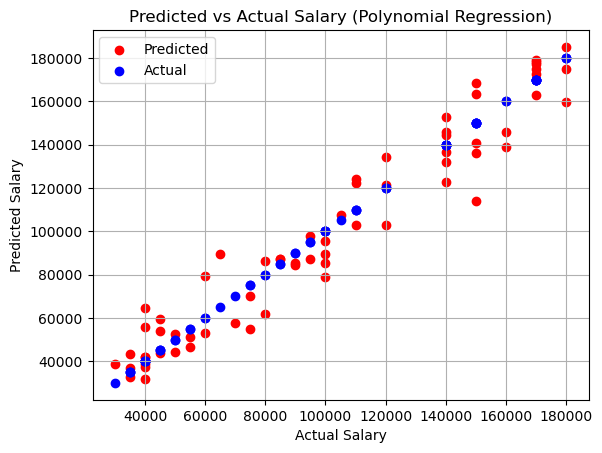

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_poly, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='blue', label='Actual')

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.grid(True)
plt.legend()
plt.title('Predicted vs Actual Salary (Polynomial Regression)')
